# Regression - Geçiş verilerden geleceği tahmin etme Rakam tahmin etme

Bu gün Regression algoritmalarını detaylı şekilde göreceğiz.

In [172]:
#pip install xlrd

In [173]:
import pandas as pd # data dosyalarını okuma paketi

In [174]:
df = pd.read_excel('cars.xls')

## EDA - Exploratory Data Analysis

In [175]:
df.head() #ilk beş satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [176]:
df.shape #Satır ve Sütun sayıs

(804, 12)

In [177]:
len(df) #satır sayısı

804

In [178]:
df.sample() #Random satır getirme

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
335,13994.906458,17270,Chevrolet,Cobalt,Sedan 4D,Sedan,4,2.2,4,0,1,1


In [179]:
df.info() # Veri , data hakkında bilgi veriyor
# float ondalıklı sayı , int tam sayı , objec yazı metin, string catecory değişkeni

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [180]:
df.describe() # istatiksel verileri gösterir

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [181]:
df.corr(numeric_only=True)  # corelasyon hesaplıyor 

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [182]:
import seaborn as sns

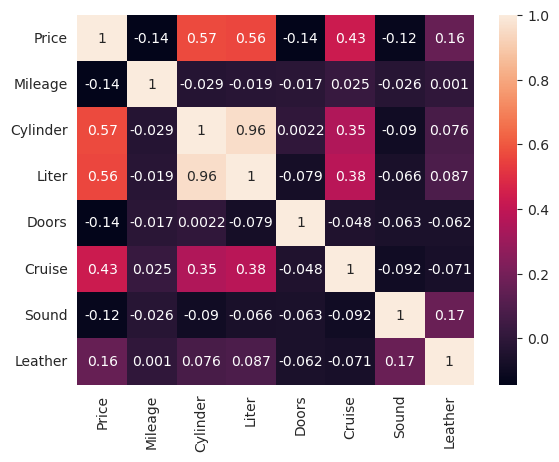

In [183]:
sns.heatmap(df.corr(numeric_only=True) ,annot=True);


In [184]:
# outlier formulü ortalama +-3 * Standart sapma 

In [185]:
df['Price'].mean(),df['Price'].median(),df['Price'].std(),df['Price'].max()

(21343.143767325837, 18024.995019071903, 9884.852800898007, 70755.46671654288)

In [186]:
df.tail() # sondan 5 satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [187]:
df.isnull().sum() # hangi sütunda boş veri var

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [188]:
df['Make'].unique()  # hangi markaların tekil verileri

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [189]:
df['Make'].nunique() # kaç tane tekil araba var

6

In [190]:
df['Make'].value_counts() #Hangi arabadan kaçtane var ve büyükten küçüğe sırala

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [191]:
df['Make'].value_counts(normalize=True) # bu veri içinde yüzdeleri görmek için

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

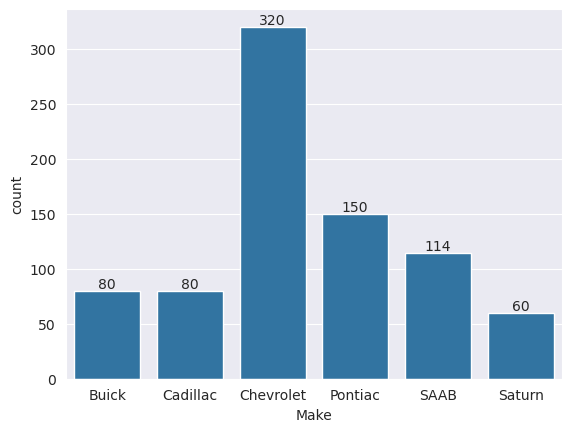

In [192]:
ax=sns.countplot(x=df['Make']) # yukarıdaki verileri grafikte gösterelim
ax.bar_label(ax.containers[0]);

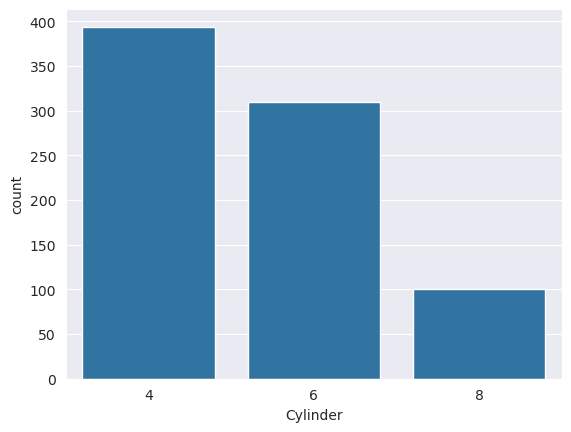

In [193]:
sns.countplot(x=df['Cylinder']);

In [1]:
sns.countplot(y=df['Doors']); # y = yaparsak yatay geliyor

NameError: name 'sns' is not defined

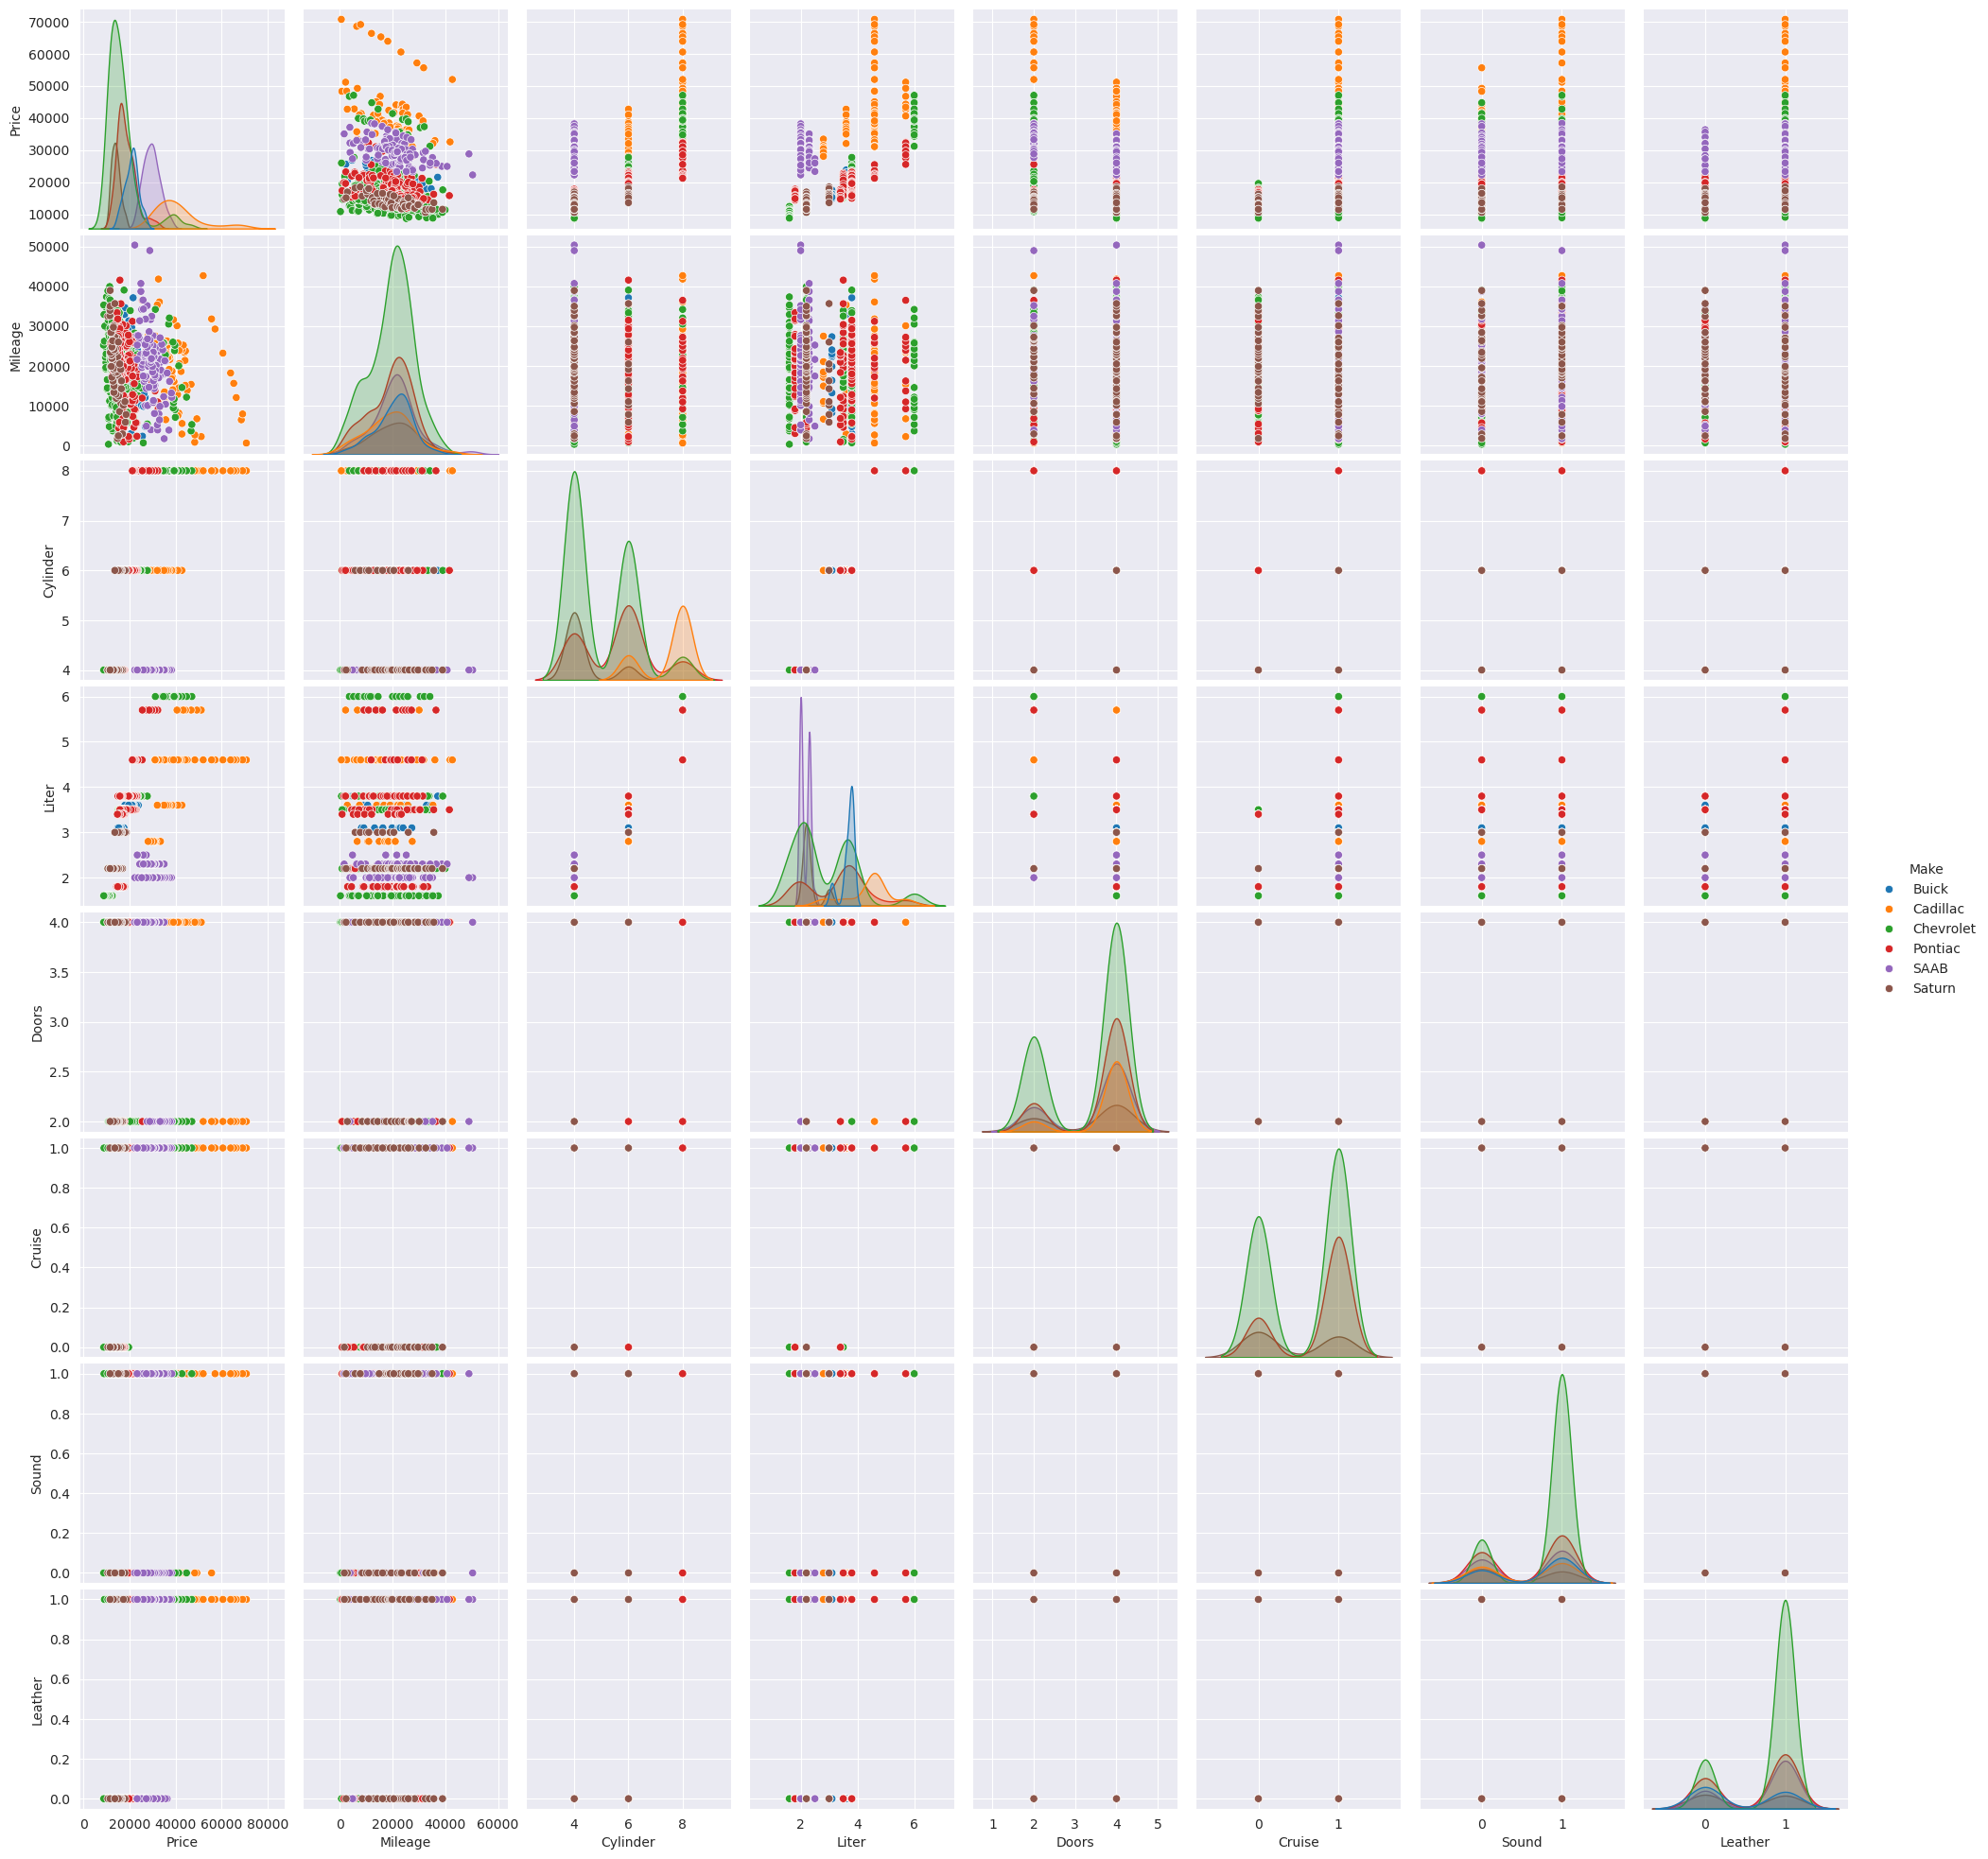

In [195]:
sns.pairplot(df,hue='Make') # bütün sütunların bütün sütunlara göre değişimi marka rengi farklı

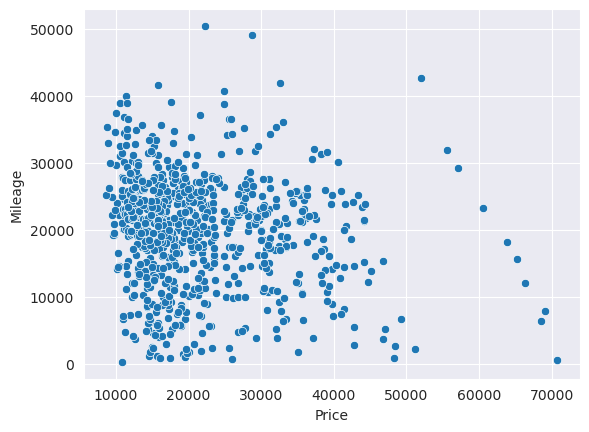

In [196]:
# Fiyatla üzerindeki km nasıl değişiyor
# scatterplot noktasal olarak gösterir.
sns.scatterplot(x= 'Price', y='Mileage',data=df);

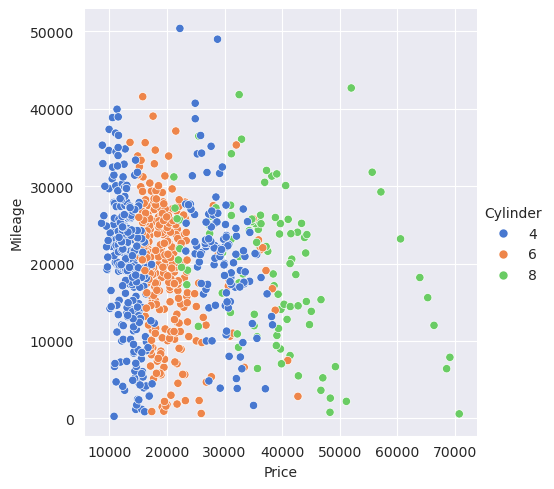

In [197]:
# Fiyat silindir 
sns.relplot(x= 'Price', y='Mileage',data=df, palette= 'muted',hue='Cylinder');

In [198]:
 #üç boyulu grafikde alabiliriz bu arada EDA ya devam ediyo

# P- Değeri Hesaplama

In [199]:
#Ho =ARabanın fiyatı ve km arasında bir bağ yok
#Ha =ARabanın fiyatı ve km arasında bir bağ var
#p - değerine bakıyoruz eğer p<0.05 Ho reddet alternatifi kabul et

In [200]:
from scipy.stats import ttest_ind

In [201]:
_,p=ttest_ind(df['Price'],df['Mileage'])
p


0.0008662338227446262

In [202]:
  #Sonuc p=0.0008662338227446262 <0.05 sıfır hipotezini reddedip alternatifini kabul ediyor.

<Axes: xlabel='Price', ylabel='Count'>

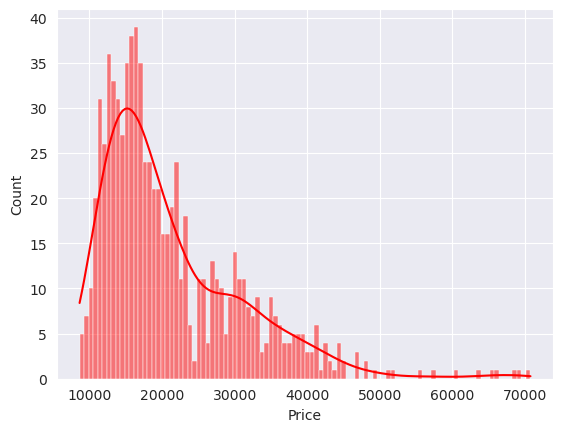

In [203]:
sns.histplot(x=df['Price'],kde=True,bins=100,color='red')

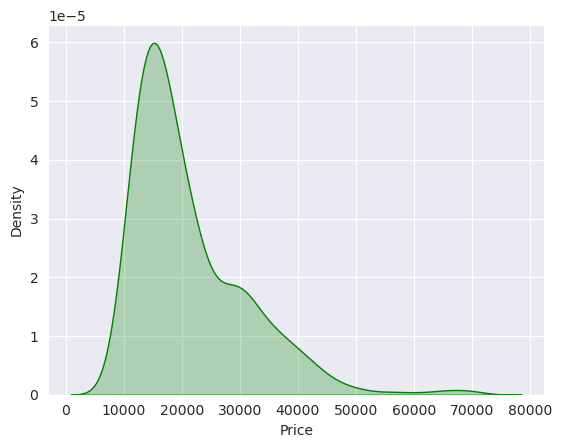

In [204]:
sns.kdeplot(x=df['Price'],fill=True,color='green');

<Axes: xlabel='Price'>

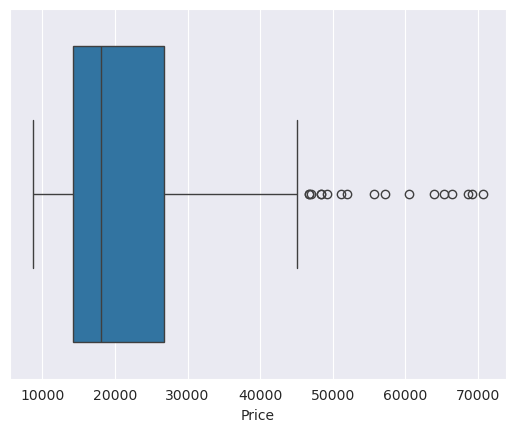

In [205]:
sns.boxplot(x=df['Price'])

<Axes: >

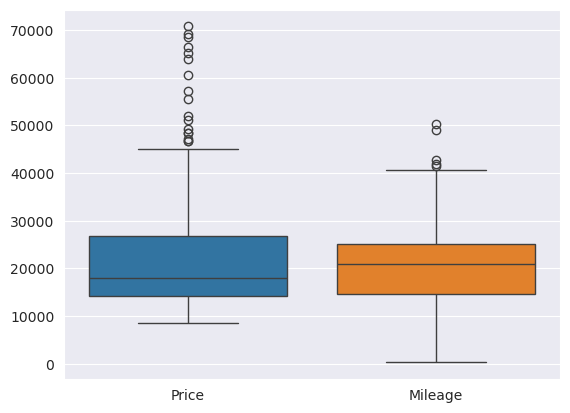

In [206]:
sns.boxplot([df['Price'],df['Mileage']])

<Axes: xlabel='Make', ylabel='Price'>

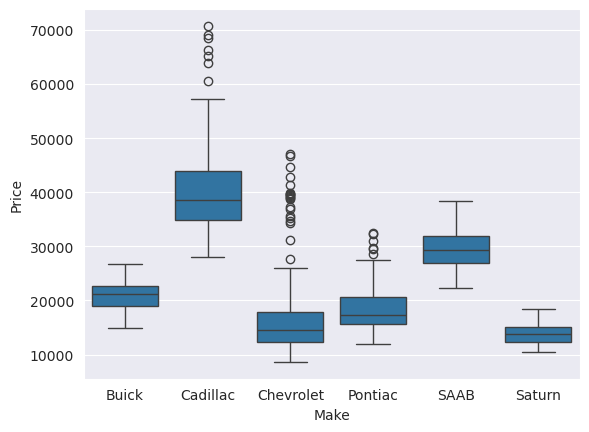

In [207]:
sns.boxplot(x='Make',y='Price',data=df)

<Axes: xlabel='Make', ylabel='Price'>

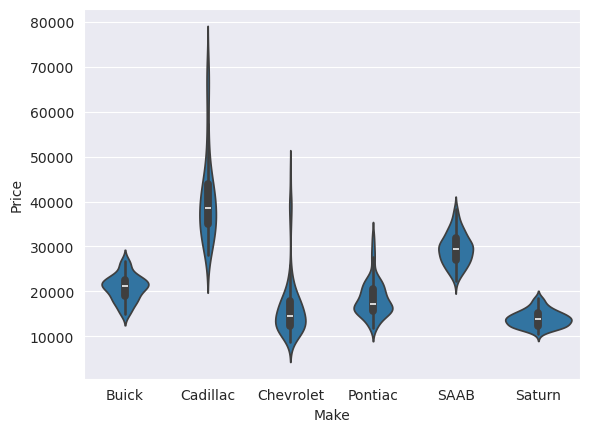

In [208]:
sns.violinplot(x='Make',y='Price',data=df)

In [209]:
import plotly.express as px

In [210]:
px.bar(df,x='Make',y='Price',color='Make')

In [211]:
px.scatter_3d(df,x='Mileage',y='Price',z='Cylinder',color='Make')

In [212]:
#Data Science # MLOps paketlerin kendisini eğitmesi cep telefonuna ekleme v.s 

In [213]:
px.sunburst(df,path=['Make','Model','Trim'],values='Price')

In [214]:
#Eda bitti

# Feature Engineering - 

In [215]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [216]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [217]:
x=df[['Mileage','Cylinder','Liter','Cruise']]
y=df[['Price']]

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [220]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

# Modelling

In [221]:
from sklearn.linear_model import LinearRegression

In [283]:
lr=LinearRegression()

In [339]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [285]:
model = lr.fit(x_train,y_train) #Makine öğrenmesi başladı

In [287]:
tahmin=lr.predict(x_test)

In [288]:
from sklearn.metrics import r2_score, mean_squared_error

In [289]:
mean_squared_error(y_test,tahmin)**0.5

1523.6314728711325

In [290]:
r2_score(y_test,tahmin)

0.9707311770106378

In [291]:
# Label Encoding 

In [292]:
x=df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']]
y=df[['Price']]

In [293]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [294]:
x=pd.get_dummies(x,drop_first=True)

In [295]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,9135,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,13196,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16342,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,19832,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [296]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [297]:
model = lr.fit(x_train,y_train) #Makine öğrenmesi başladı

In [298]:
tahmin=model.predict(x_test)

In [299]:
mean_squared_error(y_test,tahmin)**0.5 #Root Mean Squared Error Hata

1523.6314728711325

In [300]:
r2_score(y_test,tahmin)

0.9707311770106378

In [301]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [302]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [303]:
Rmodel=R.fit(x_train,y_train)

In [304]:
tahmin2=Rmodel.predict(x_test)

In [305]:
mean_squared_error(y_test,tahmin2)**0.5 #Root Mean Squared Error Hata

1575.6786242840121

In [306]:
r2_score(y_test,tahmin2)

0.968697381031873

In [307]:
Lmodel=L.fit(x_train,y_train)

In [308]:
tahmin3=Lmodel.predict(x_test)

In [309]:
mean_squared_error(y_test,tahmin3)**0.5 #Root Mean Squared Error Hata

1527.043092830228

In [310]:
r2_score(y_test,tahmin3)

0.9705999564419018

In [311]:
Emodel = E.fit(x_train,y_train)

In [312]:
tahmin4=Emodel.predict(x_test)

In [313]:
mean_squared_error(y_test,tahmin4)**0.5 #Root Mean Squared Error Hata

5916.121656152222

In [314]:
r2_score(y_test,tahmin4)

0.558714578586518

In [315]:
# Coefficients -Katsayılar

In [316]:
lr.coef_

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [317]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [318]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

In [319]:
feature_importance

,Feature,Coefs
28,Trim_Hardtop Conv 2D,16758.414214
4,Make_Cadillac,15536.446130
2,Liter,7383.319566
12,Trim_Arc Conv 2D,7059.939896
7,Make_SAAB,6851.000276
41,Trim_Linear Conv 2D,4528.670272
9,Trim_Aero Conv 2D,3905.882237
18,Trim_Conv 2D,3540.183141
14,Trim_Arc Wagon 4D,138.127365
0,Mileage,-0.198809


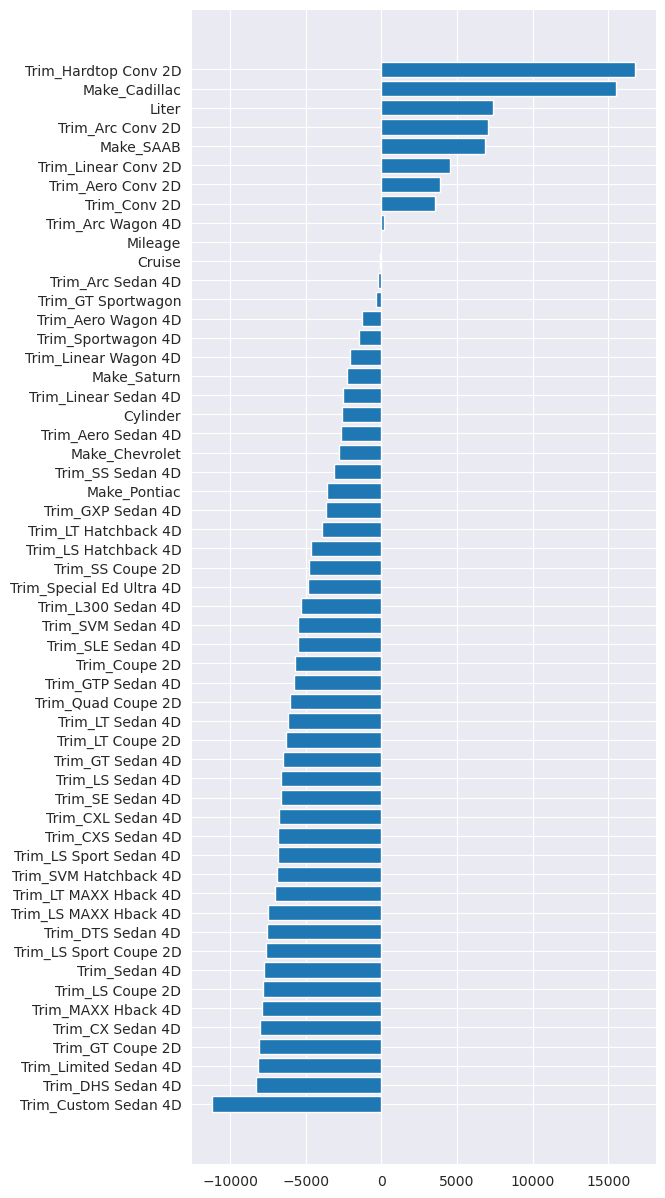

In [320]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis() 

In [321]:
# Recression da basarı oranı için bilinmesi gerekenler
1- R2_score >0,85
2- Düşük RMSE
3- Residuals shold follow normal distribution

SyntaxError: invalid syntax (1213546817.py, line 3)

In [322]:
residuals=tahmin-y_test

In [323]:
residuals

,Price
192,-559.667911
717,-1027.528386
168,-1144.233441
522,-2909.433116
536,-494.086073
...,...
658,812.069687
356,-4025.396437
525,-2361.161783
748,961.806180


<Axes: ylabel='Count'>

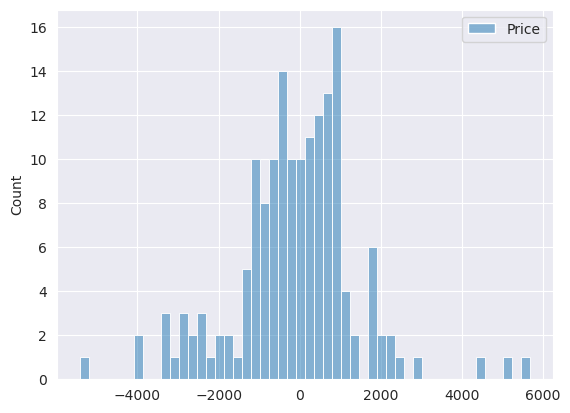

In [324]:
sns.histplot(residuals,bins=50)

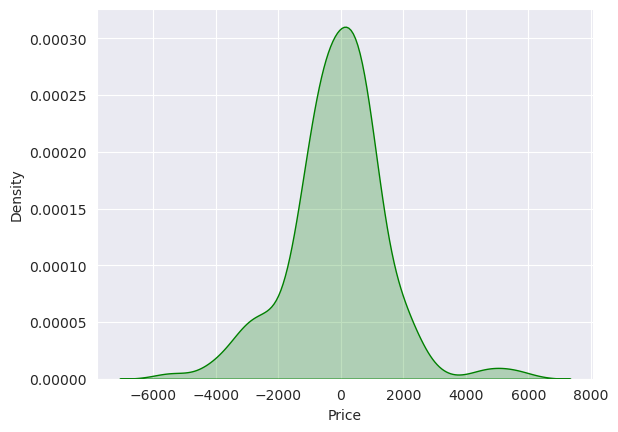

In [325]:
sns.kdeplot(x=residuals['Price'],fill=True,color='green');

In [326]:
from sklearn.tree import DecisionTreeRegressor

In [327]:
dt=DecisionTreeRegressor()

In [328]:
Dmodel=dt.fit(x_train,y_train)

In [329]:
tahmin5=dt.predict(x_test)

In [330]:
mean_squared_error(y_test,tahmin5)**0.5

1827.8308454480032

In [331]:
r2_score(y_test,tahmin5)

0.9578771844923086

In [332]:
from sklearn.ensemble import ExtraTreesRegressor

In [333]:
ET=ExtraTreesRegressor()

In [334]:
ETModel=ET.fit(x_train,y_train)

/home/sifa/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [335]:
tahmin6=dt.predict(x_test)

In [336]:
mean_squared_error(y_test,tahmin6)**0.5

1827.8308454480032

In [275]:
r2_score(y_test,tahmin6)

0.9580778228402946

In [276]:
r2_score(y_test,tahmin6)

0.9580778228402946